#Linear Regression with sklearn
#####In this notebook, we will implement Linear Regression using Hours studied vs percentage scored dataset.

##**Simple Linear Regression**

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading data from given url
df = pd.read_csv('http://bit.ly/w-data')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


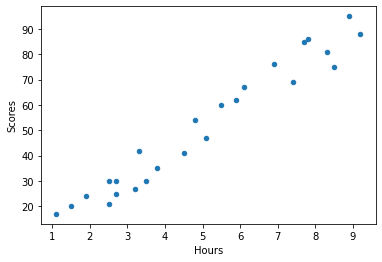

In [ ]:
#visualizing the dataset to look for any outliers

df.plot(x='Hours',y='Scores',kind='scatter')

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#####**The scatter plot and correlation matrix above shows that Hours and Scores are linearly related.**



##Prepping data for the linear regressor model

In [ ]:
#separating dependent and independent
x= np.array(df.Hours).reshape(-1,1)
y = np.array(df.Scores)

In [ ]:
#splitting dataset into test (20%) and training (80%)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,random_state=2)

In [ ]:
#initiating Linear regression model and training using training dataset
lmodel = LinearRegression()
lmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting traning data to locate best fit line
bfl = lmodel.predict(x)

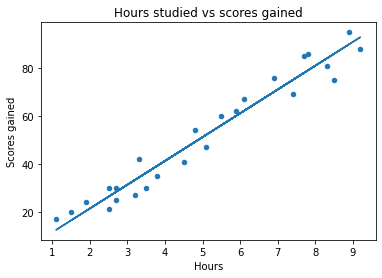

In [ ]:
#plotting best fit line along with original data scatter
df.plot(x='Hours',y='Scores',kind='scatter')
plt.plot(x,bfl)
plt.title('Hours studied vs scores gained')
plt.ylabel('Scores gained')
plt.show()

In [ ]:
#predicting y values using test x data
y_pred = lmodel.predict(x_test) 

In [ ]:
#comparing actual y values with predicted ones
pd.DataFrame({'Hours':x_test.flatten(),'actual_scores':y_test,'predcited_scores':y_pred})

,Hours,actual_scores,predcited_scores
0,1.1,17,12.442587
1,2.5,21,26.359448
2,1.9,24,20.395079
3,9.2,88,92.961570
4,6.9,76,70.098155


In [ ]:
#predicting the scores for 9.25 hours of study

st_hr = np.array(9.25).reshape(1,-1)
sc_pr = lmodel.predict(st_hr)

print ('With Study time of {} hours, model predicts {} percent of scores can be achieved.'.format(st_hr[0][0],round(sc_pr[0],2)))

With Study time of 9.25 hours, model predicts 93.46 percent of scores can be achieved.


##Model Evaluation

In [ ]:
#evaluating model with different evaluation techniques

print ('Mean Absolute error: ',mean_absolute_error(y_test,y_pred))
print ('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print ('R2 Score: ',r2_score(y_test,y_pred))

Mean Absolute error:  4.877039354964476
Root Mean Squared error:  4.9383823606376005
R2 Score:  0.9735538080811826
